In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!ls ../data/cleaned

2016-2021_fieldgoals_stats.csv
2016-2021_fumbles_stats.csv
2016-2021_interceptions_stats.csv
2016-2021_passing_stats.csv
2016-2021_receiving_stats.csv
2016-2021_rushing_stats.csv
2016-2021_tackling_stats.csv
2017-2021_aggregated_team_defensive_stats_with_sb.csv
2017-2021_aggregated_team_offensive_stats_with_sb.csv
all_superbowl_winning_rosters.csv


# Notebook Introduction: Exploring trends in super-bowl winning players over the decades
This notebook looks to explore the trends within superbowl winning teams, in order to give an indication on particular common attributes that these championship players have, as well as what these trends some attributes have followed or evolved over the decades of super bowl winning rosters (dating from 1966 to 2022). 

### Investigate trends per position for superbowl winning teams across the decades

In [6]:
sb_rosters = pd.read_csv('../data/cleaned/all_superbowl_winning_rosters.csv')
sb_rosters.head()

,year,team,no.,player,age,position,games_played,games_started,weight,height,...,approx_value,drafted_(tm/rnd/pick/yr),player_additional,salary,drafted_team/undrafted,drafted_round,drafted_pick,drafted_year,positional_group,conference_name
0,2022,kansas,73.0,Nick Allegretti,26.0,G,17,3.0,310.0,6-4,...,3.0,Kansas City Chiefs / 7th / 216th pick / 2019,AlleNi00,NaN,Kansas City Chiefs,7th,216th pick,2019,offensive_line,big ten
1,2022,kansas,32.0,Ugo Amadi,25.0,S,1,0.0,201.0,5-9,...,0.0,Seattle Seahawks / 4th / 132nd pick / 2019,AmadUg00,NaN,Seattle Seahawks,4th,132nd pick,2019,defensive_backs,pac-12
2,2022,kansas,19.0,Matt Ammendola,26.0,K,2,0.0,195.0,5-9,...,0.0,Undrafted,AmmeMa00,NaN,Undrafted,NaN,NaN,NaN,special_teamers,big 12
3,2022,kansas,39.0,Zayne Anderson,25.0,DB,3,0.0,206.0,6-2,...,0.0,Undrafted,AndeZa02,NaN,Undrafted,NaN,NaN,NaN,defensive_backs,fbs independent
4,2022,kansas,81.0,Blake Bell,31.0,TE,3,1.0,252.0,6-6,...,0.0,San Francisco 49ers / 4th / 117th pick / 2015,BellBl00,NaN,San Francisco 49ers,4th,117th pick,2015,offensive_line,big 12


In [7]:
# Adding decade column

sb_rosters['year'] = sb_rosters['year'].astype(str)
sb_rosters['decade'] = sb_rosters['year'].str[:3] + '0s'

In [8]:
# Creating positional groupings for lighter visualisation.

positional_groups = {'offensive_line':['LT', 'T', 'LG', 'G', 'C', 'RG', 'RT', 'ROT'], 'receiver':['WR', 'TE','SE', 'FL'],
                    'running_backs':['RB', 'HB', 'TB', 'FB', 'LH,' 'RH', 'BB' 'B', 'WB'], 'special_teamers':[ 'LS', 'K', 'P', 'PR', 'KR', 'RET'],
                    'defensive_line':['DL', 'E', 'LE', 'RE', 'LDE', 'DE', 'LDT', 'DT', 'NT', 'MG' , 'DG', 'RDT', 'RDE'], 
                    'linebacker':['LOLB', 'RUSH', 'OLB', 'LLB', 'WILL', 'ILB', 'SLB', 'MLB', 'WLB', 'RILB', 'ROLB', 'SAM', 'LB'],
                    'defensive_backs':['LCB', 'CB', 'RCB', 'SS', 'FS', 'LDH', 'RDH', 'S', 'RS', 'DB'],
                    'Quarterback':['QB']}

def get_position(row):
    for position, positions_list in positional_groups.items():
        if any(pos in row['position'] for pos in positions_list):
            return position
    return None

sb_rosters['positional_group'] = sb_rosters.apply(get_position, axis=1)


In [9]:
grouped_position = sb_rosters.groupby(['decade', 'position']).agg({'age':'mean', 'years_in_league':'mean', 'player':'count'}).reset_index()
grouped_position.head()

,decade,position,age,years_in_league,player
0,1960s,C,25.571429,3.000000,7
1,1960s,DB,25.272727,1.454545,11
2,1960s,DE,25.000000,0.600000,5
3,1960s,DT,24.000000,1.400000,5
4,1960s,E,34.500000,12.500000,2


In [10]:
grouped_positional_group = sb_rosters.groupby(['decade', 'positional_group']).agg({'age':'mean', 'years_in_league':'mean', }).reset_index()
grouped_positional_group

,decade,positional_group,age,years_in_league
0,1960s,Quarterback,31.000000,8.727273
1,1960s,defensive_backs,26.500000,2.900000
2,1960s,defensive_line,27.823529,4.764706
3,1960s,linebacker,25.428571,3.190476
4,1960s,offensive_line,26.904762,4.238095
5,1960s,receiver,27.153846,4.307692
6,1960s,running_backs,26.130435,3.565217
7,1960s,special_teamers,30.000000,6.833333
8,1970s,Quarterback,29.086957,6.173913
9,1970s,defensive_backs,25.313725,2.843137


offensive_line 0.724963151207353
running_backs 0.49230922899517005
Quarterback 0.6779809147687641
receiver 0.6580409340526113
defensive_backs 0.7674181516698506
linebacker 0.9054076968096816
defensive_line 0.5146001962147494
special_teamers 0.9313939027614634


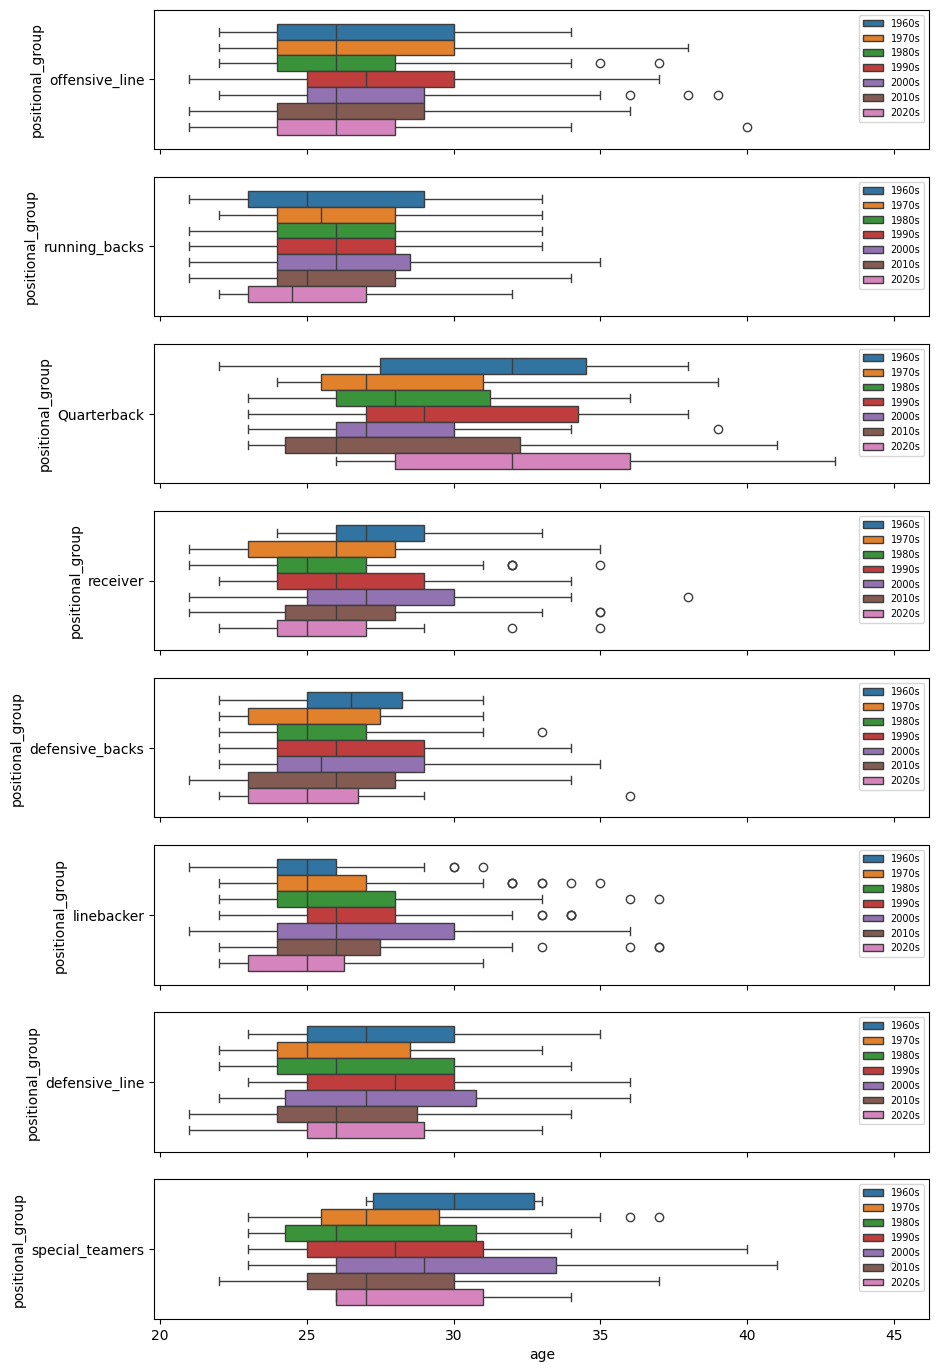

In [11]:
# Creating list of groupings and decade order for the following for loop and order of decades in the hue. 

groupings = ['offensive_line','running_backs', 'Quarterback', 'receiver','defensive_backs', 'linebacker',  'defensive_line', 'special_teamers']
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

# Creating a for loop with a boxplot per positional group to visualise the general distribution of age per positional group, by decade. 
# the for loop also generates a skewness per positional group which helps indicate the level of change that takes place in the whole dataframe
# for the given positional group, indicating variance over all decades. 

fig, ax = plt.subplots(len(groupings), 1, figsize=(10, 17), sharex=True)
i = 0
#plt.xlim(sb_rosters['age'].min(), sb_rosters['age'].max())
for group in groupings:
    data = sb_rosters.loc[sb_rosters['positional_group'] == group]
    sns.boxplot(data=data, x='age', y='positional_group', hue='decade', hue_order=decade_order , ax=ax[i]
               ).legend(fontsize=7, loc='upper right')
    print(group, data['age'].skew())
    i += 1
plt.show()

### Conclusion to EDA on Age per position trends
When looking at the players on super bowl winning rosters throughout the decades, the trends per age indicate whether the player is in or near their prime. 

#### Defensive players
Defensive linemen particularly haven't changed too much in terms of age and tend to be around 25 and 28 when they are on super bowl winning rosters. 
Linebackers' age ranges have centered around 24-28, likely because they do similar jobs to defensive linemen but veer a little on the younger side due to the more athletic demands of the position, relative to linemen. 
Defensive backs are only slightly younger with their lower age range and actually have higher upper ranges relative to linebackers which was surprising. This might be due to the lesser physical nature of the position compared to linebacker, while maintaining similar heights and other stature measures. 

#### Offensive players
Offensive linemen and quarterbacks have tended to be the oldest on the field throughout the years when winning superbowls, suggesting that there is a certain pedigree and number of years in the NFL required in order to be put in a best position for winning. 

Receivers looked to have become decreasingly younger, suggesting the game has shifted to a more receiver-dependent playing style, which can be supported by the fact that passing became more frequent in recent decades. The shorter IQRs of receivers ages' also indicate the shorter 'superbowl winning prime' ages for receivers, linebackers and running backs. 

---

### Investigation into 'years_in_league'
This section of the notebook will aim to identify potential trends in terms of years players have already recorded in the league when winning a super bowl championship, in order to indicate when positional groups are typically in their prime for winning a super bowl, and split this across the decades. 

First we will be comparing the average 'years in the league' of these superbowl winning positions and seeing what the trend is over the decades, and then also looking into the average 'years in the league' for those winning their first super bowl, since players who win multiple super bowls will be naturally increasing their statistic 'years in the league'.  

In [41]:
print("% of superbowl winning players who have won more than 1 superbowl: " + str(round(abs(sb_rosters.drop_duplicates(subset='player', keep='first').shape[0] - sb_rosters.shape[0]) 
                       / sb_rosters.shape[0] * 100, 2)))

% of superbowl winning players who have won more than 1 superbowl: 23.49


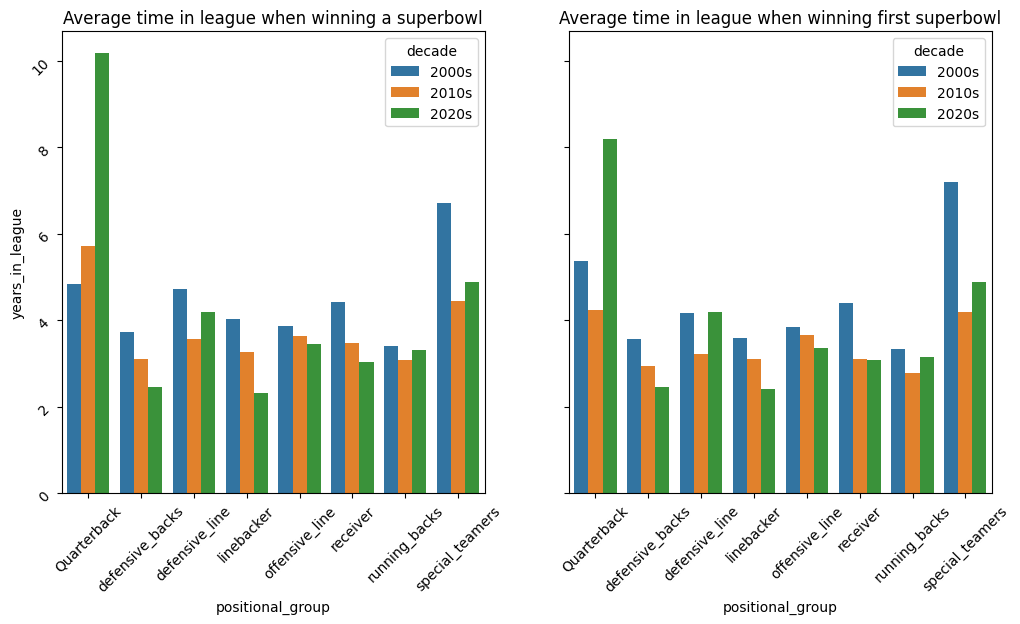

In [29]:
# Looking at the average years in league when winning a championship per positional group.

grouped_positional_years = sb_rosters.groupby(['decade', 'positional_group']).agg({'years_in_league':'mean'}).reset_index()

# filtering df to only include player's first super bowl based on player name. 
first_super_bowl = sb_rosters.drop_duplicates(subset='player', keep='first')
first_super_bowl_pos_grouped = first_super_bowl.groupby(['decade', 'positional_group']).agg({'years_in_league':'mean'}).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

g = sns.barplot(data=grouped_positional_years.loc[grouped_positional_years['decade'].isin(
    ['2000s', '2010s', '2020s'])], x='positional_group', y='years_in_league', 
            hue='decade', ax=ax[0])
g.set_title('Average time in league when winning a superbowl')
ax[0].tick_params(labelrotation=45)
f = sns.barplot(data=first_super_bowl_pos_grouped.loc[first_super_bowl_pos_grouped['decade'].isin(
    ['2000s', '2010s', '2020s'])], x='positional_group', y='years_in_league', 
            hue='decade', ax=ax[1])
f.set_title('Average time in league when winning first superbowl')
ax[1].tick_params(labelrotation=45)
plt.show()

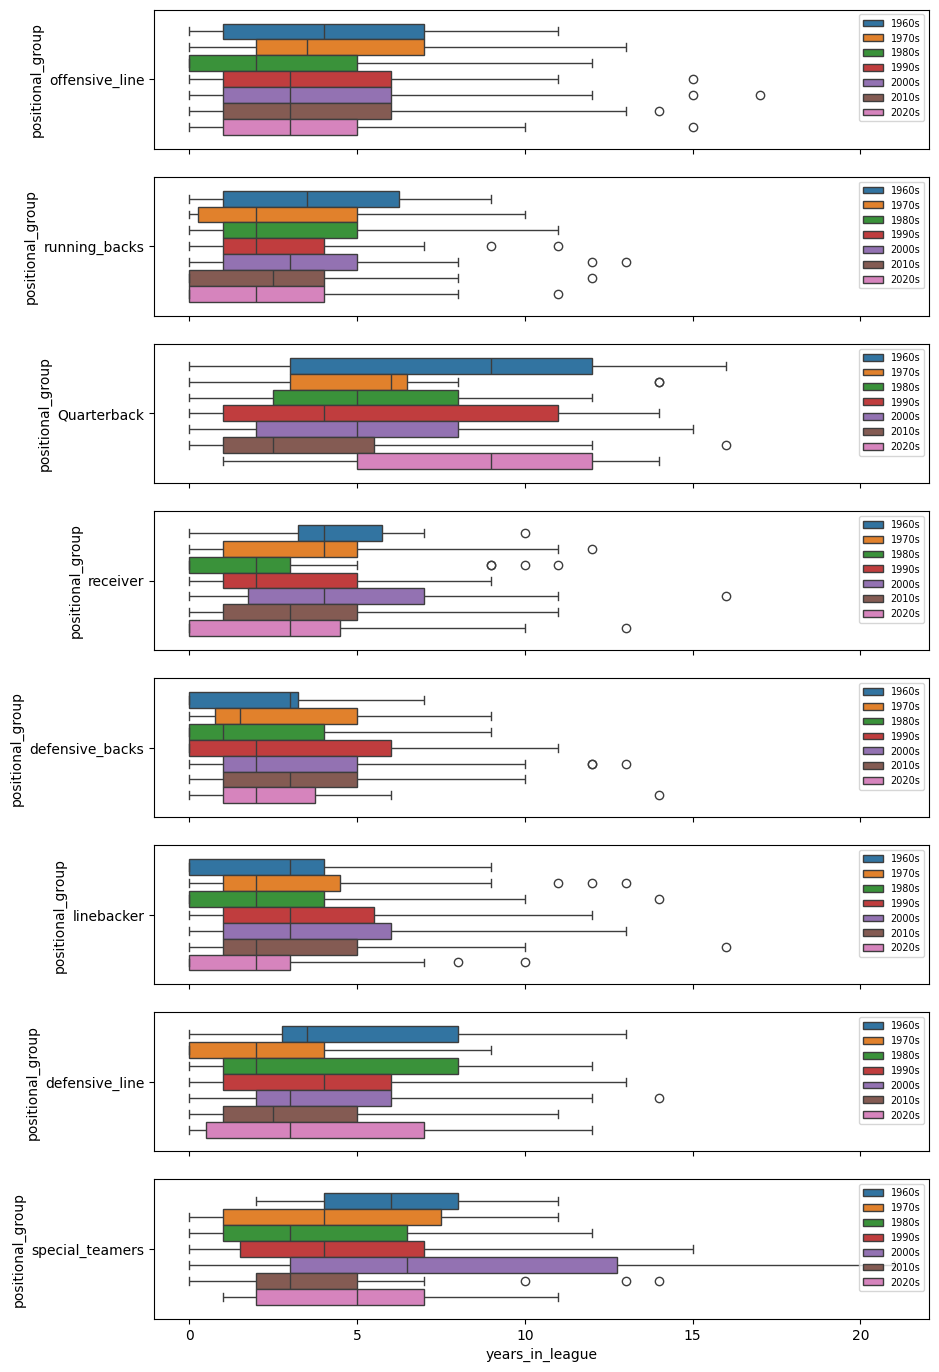

In [119]:
groupings = ['offensive_line','running_backs', 'Quarterback', 'receiver','defensive_backs', 'linebacker',  'defensive_line', 'special_teamers']
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

fig, ax = plt.subplots(len(groupings), 1, figsize=(10, 17), sharex=True)
i = 0
#plt.xlim(sb_rosters['age'].min(), sb_rosters['age'].max())
for group in groupings:
    data = first_super_bowl.loc[first_super_bowl['positional_group'] == group]
    sns.boxplot(data=data, x='years_in_league', y='positional_group', hue='decade', hue_order=decade_order , ax=ax[i]
               ).legend(fontsize=7, loc='upper right')
    #for decade in decade_order:
    #    print(group, data.loc[data['decade'] == decade ]['years_in_league'].skew())
    i += 1
plt.show()

### Conclusion: Years in league before first super bowl

When looking at the average number of years in the nfl before a player typically finds themselves on a super bowl winning roster, one can see there is a general downward trend in the average number of years in the league across the last three decades, all apart from quarterbacks which has seen somewhat of a steady increase. This further supports the previous claim that quarterbacks with more years in the league has a higher likelihood to lead a team to a superbowl. 

Another insight of interest is that the typical rookie contract is around 3 years, which coincides with the general average time in league when winning a championship. This can suggest multiple assumptions.

- Teams draft/sign young players with the intent that they will win a championship by the last year of that player's contract. These 3 year contracts typically apply to players who have been drafted in the first 4 rounds of the draft.
- Players who finish their rookie contract (assuming 2-3 years) will sign a new contract and win relatively soon after signing that new contract. Teams therefore might be looking for players who are finishing their rookie contract to bring those into their organisation to boost their chances of winning.

What this would mean for a general manager or team looking to build a super-bowl calibre team: 

- If you are looking to win within the next 3 years, the players you sign in the next year are the most significant. Look to sign a quarterback who has already been in the league for 2-3 years and shows potential to grow further.
- If you are looking to win a superbowl in the next year, be confident the players you have in your team for at least the last 2 years are the some of the best in their position across the whole league. The chances of winning super bowls with those players will decrease after the next 2 years. 
- This increases the worth of quarterbacks who have been in the league for 4+ years and are still playing at a high level, as their chances of winning a super bowl remain strong until they've been in the league for about 8-9 years, provided they remain healthy. 



## Super Bowl Player Draft Split Exploration

In [43]:
sb_rosters

,year,team,no.,player,age,position,games_played,games_started,weight,height,...,drafted_(tm/rnd/pick/yr),player_additional,salary,drafted_team/undrafted,drafted_round,drafted_pick,drafted_year,positional_group,conference_name,decade
0,2022,kansas,73.0,Nick Allegretti,26.0,G,17,3.0,310.0,6-4,...,Kansas City Chiefs / 7th / 216th pick / 2019,AlleNi00,NaN,Kansas City Chiefs,7th,216th pick,2019,offensive_line,big ten,2020s
1,2022,kansas,32.0,Ugo Amadi,25.0,S,1,0.0,201.0,5-9,...,Seattle Seahawks / 4th / 132nd pick / 2019,AmadUg00,NaN,Seattle Seahawks,4th,132nd pick,2019,defensive_backs,pac-12,2020s
2,2022,kansas,19.0,Matt Ammendola,26.0,K,2,0.0,195.0,5-9,...,Undrafted,AmmeMa00,NaN,Undrafted,NaN,NaN,NaN,special_teamers,big 12,2020s
3,2022,kansas,39.0,Zayne Anderson,25.0,DB,3,0.0,206.0,6-2,...,Undrafted,AndeZa02,NaN,Undrafted,NaN,NaN,NaN,defensive_backs,fbs independent,2020s
4,2022,kansas,81.0,Blake Bell,31.0,TE,3,1.0,252.0,6-6,...,San Francisco 49ers / 4th / 117th pick / 2015,BellBl00,NaN,San Francisco 49ers,4th,117th pick,2015,offensive_line,big 12,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3154,1966,greenbay,63.0,Fuzzy Thurston,33.0,LG,12,12.0,247.0,6-1,...,Philadelphia Eagles / 5th / 54th pick / 1956,ThurFu20,NaN,Philadelphia Eagles,5th,54th pick,1956,offensive_line,NaN,1960s
3155,1966,greenbay,37.0,Phil Vandersea,23.0,LB,14,0.0,245.0,6-3,...,Denver Broncos / 9th / 65th pick / 1965 Green ...,VandPh20,NaN,Denver Broncos,9th,65th pick,1965 Green Bay Packers,linebacker,fbs independent,1960s
3156,1966,greenbay,73.0,Jim Weatherwax,23.0,DT,14,1.0,260.0,6-7,...,San Diego Chargers / 5th / 38th pick / 1965 Gr...,WeatJi22,NaN,San Diego Chargers,5th,38th pick,1965 Green Bay Packers,offensive_line,NaN,1960s
3157,1966,greenbay,24.0,Willie Wood,30.0,SS,14,14.0,190.0,5-10,...,Undrafted,WoodWi00,NaN,Undrafted,NaN,NaN,NaN,defensive_backs,pac-12,1960s


In [44]:
# Grouping by decade, team that won SB, team that drafted (or undrafted) and the number of players from draft team in said sb-winning team 
drafted_sbw = sb_rosters.groupby(['decade', 'team','drafted_team/undrafted']).agg({
    'drafted_team/undrafted':'count'}).rename(columns={'drafted_team/undrafted':'total_drafted'}).reset_index()


# Grouping by decade, team that won the superbowl, team that drafted, position, and number of players of that position that won a superbowl in that decade for said team
drafted_sbw_pos = sb_rosters.groupby(['decade', 'position', 'team', 'drafted_team/undrafted']).agg({
    'drafted_team/undrafted':'count'}).rename(columns={'drafted_team/undrafted':'total_drafted'}).reset_index()


In [45]:
drafted_sbw_pos.sort_values('total_drafted', ascending=False)

,decade,position,team,drafted_team/undrafted,total_drafted
360,1970s,WR,pittsburgh,Pittsburgh Steelers,16
277,1970s,RB,pittsburgh,Pittsburgh Steelers,13
1446,2010s,DB,newengland,New England Patriots,12
1150,2000s,LB,newengland,Undrafted,12
674,1990s,DB,dallas,Dallas Cowboys,11
...,...,...,...,...,...
826,1990s,LLB,denver,Denver Broncos,1
825,1990s,LLB,dallas,Undrafted,1
823,1990s,LILB,newyork,Dallas Cowboys,1
822,1990s,LG,washington,Washington Redskins,1


In [46]:
drafted_sbw.sort_values('total_drafted', ascending=False)

,decade,team,drafted_team/undrafted,total_drafted
103,1970s,pittsburgh,Pittsburgh Steelers,142
162,1980s,sanfrancisco,San Francisco 49ers,98
198,1990s,dallas,Dallas Cowboys,88
497,2010s,newengland,New England Patriots,88
351,2000s,newengland,New England Patriots,81
...,...,...,...,...
381,2000s,newyork,Detroit Lions,1
380,2000s,newyork,Denver Broncos,1
379,2000s,newyork,Chicago Bears,1
31,1960s,kansas,Pittsburgh Steelers,1


### Visualisation of draft by teams

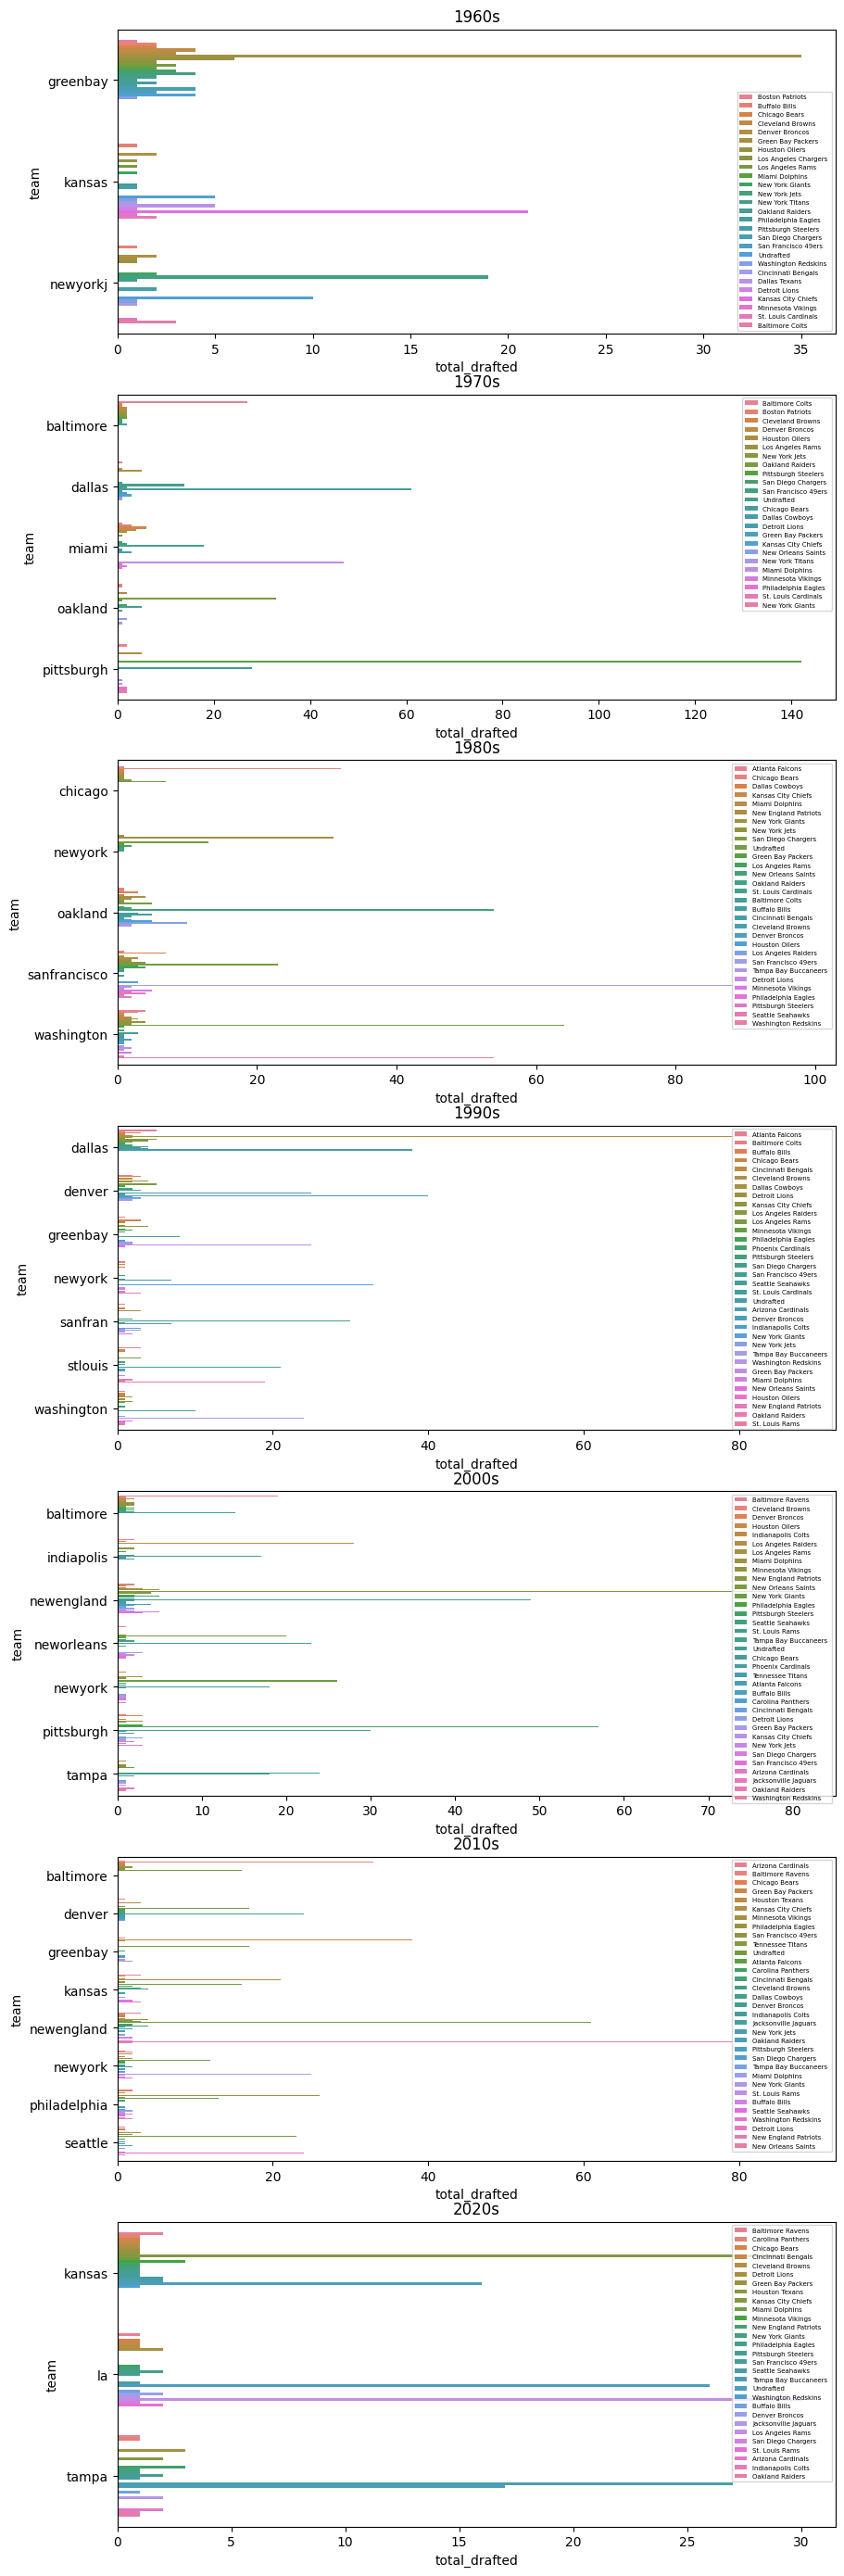

In [47]:
# Plot split by decade to show the teams that drafted the most players which won SBs for teams who won superbowls in that decade.

# Conclusion: Teams that won the most superbowls traditionally drafted the most players themselves or signed a lot through
# undrafted players

fig, ax = plt.subplots(7,1, figsize=(10, 35))
sns.color_palette()

i = 0
for decade in drafted_sbw['decade'].unique():
    data=drafted_sbw.loc[drafted_sbw['decade'] == decade]
    sns.barplot(data=data, y='team', x='total_drafted', hue='drafted_team/undrafted', ax=ax[i]).legend(fontsize='5')
    ax[i].set_title(decade)
    i += 1
plt.show()

In [48]:
# Filtering out any rows where total_drafted < n to make visualisation a bit lighter and easier to digest

n = 3

display(drafted_sbw.shape)
display(drafted_sbw.loc[drafted_sbw['total_drafted'] > n].shape)
drafted_sbw_filtered = drafted_sbw.loc[drafted_sbw['total_drafted'] > n]


(614, 4)

(111, 4)

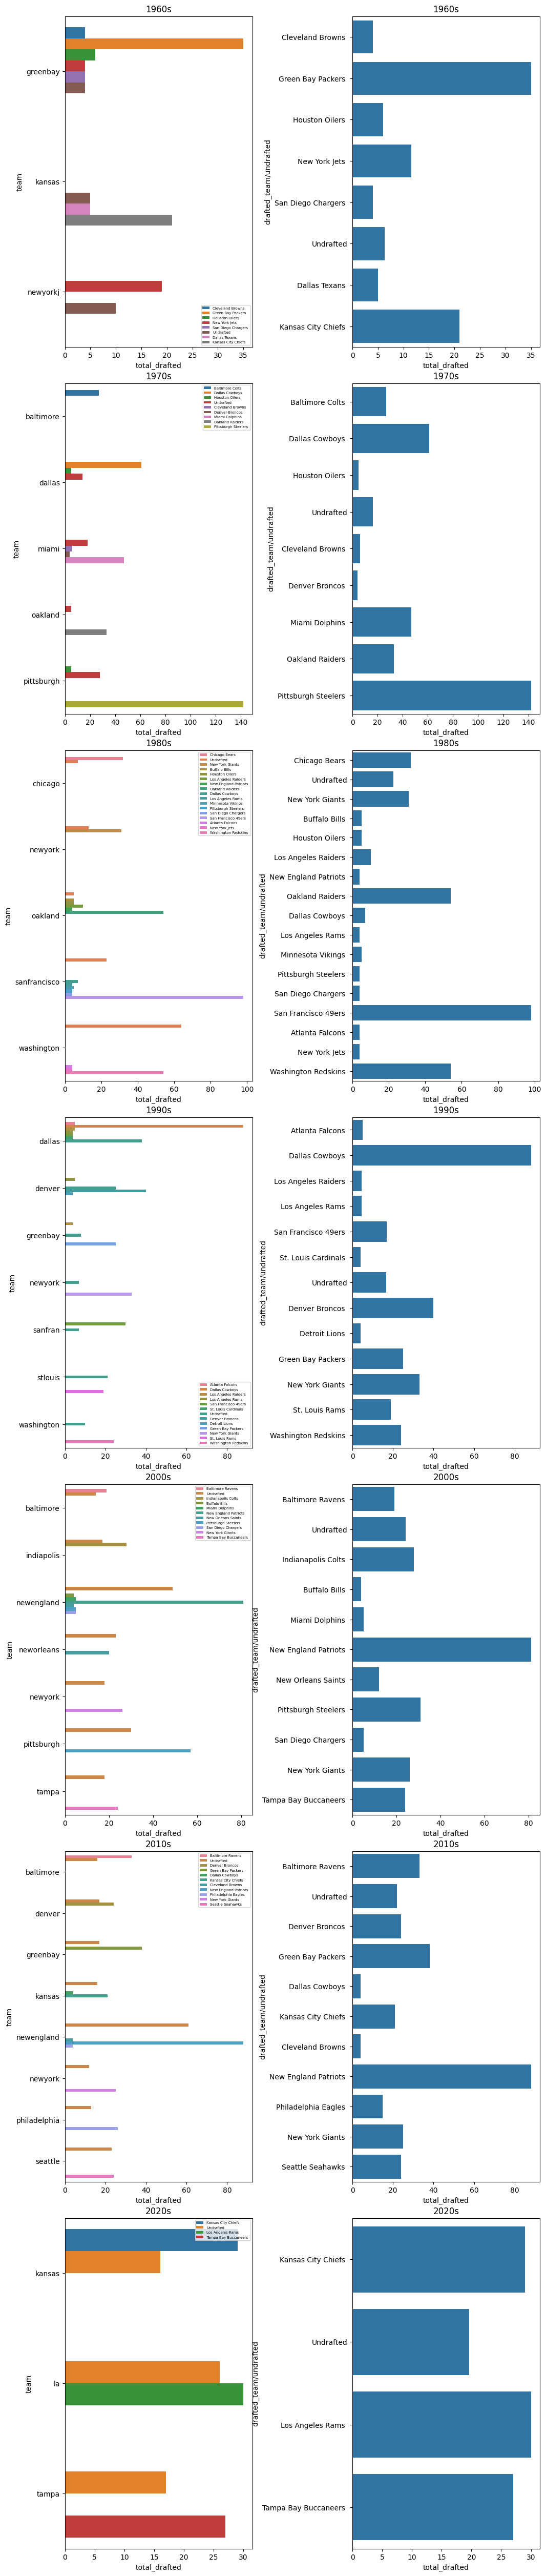

In [51]:
# Creating same graphs as before, with filtered dataframes where total_drafted > n, split by decade
# left column includes super bowl winning team
# right column removes this from the graph and simply show the players drafted

fig, ax = plt.subplots(7,2, figsize=(10, 50))
sns.color_palette()
fig.tight_layout(w_pad=11.0, h_pad=3.0)
i = 0
for decade in drafted_sbw_filtered['decade'].unique():
    data=drafted_sbw_filtered.loc[drafted_sbw_filtered['decade'] == decade]
    sns.barplot(data=data, y='team', x='total_drafted', hue='drafted_team/undrafted', ax=ax[i, 0]).legend(fontsize='5')
    ax[i, 0].set_title(decade)
    sns.barplot(data=data, y='drafted_team/undrafted', x='total_drafted', errorbar=None, ax=ax[i, 1])#.legend(fontsize='5')
    ax[i, 1].set_title(decade)
    i += 1
plt.show()

In [52]:
# Grouping number of teams involved a SB-winning's roster.

decade_grouped_teams_to_player_drafting = drafted_sbw.groupby('decade').agg({
    'team':'nunique', 'drafted_team/undrafted':'nunique', 'total_drafted':'sum'}).reset_index()
decade_grouped_teams_to_player_drafting

,decade,team,drafted_team/undrafted,total_drafted
0,1960s,3,27,174
1,1970s,5,24,465
2,1980s,5,30,537
3,1990s,7,34,557
4,2000s,7,35,596
5,2010s,8,33,621
6,2020s,3,29,209


In [53]:
# Adding column for Average no. of teams drafting to winning teams per decade
decade_grouped_teams_to_player_drafting['teamsdrafts_to_sb_winners'] = round(decade_grouped_teams_to_player_drafting[
                                                                             'drafted_team/undrafted']/decade_grouped_teams_to_player_drafting['team'], 2)

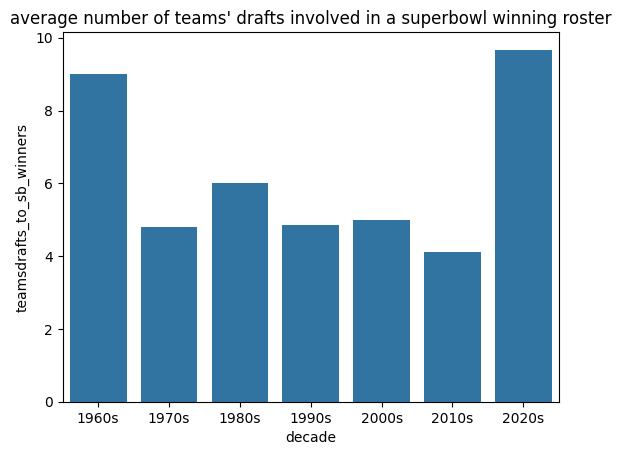

In [54]:
# Barplot to show the average number of teams' drafts involved in a superbowl winning roster. 

sns.barplot(data=decade_grouped_teams_to_player_drafting, x='decade', y='teamsdrafts_to_sb_winners').set_title("average number of teams' drafts involved in a superbowl winning roster")
plt.show()

In [55]:
drafted_sbw_pos.head()

,decade,position,team,drafted_team/undrafted,total_drafted
0,1960s,C,greenbay,Green Bay Packers,1
1,1960s,C,greenbay,New York Jets,2
2,1960s,C,greenbay,Oakland Raiders,1
3,1960s,C,kansas,Dallas Texans,1
4,1960s,C,kansas,St. Louis Cardinals,1


In [62]:
drafted_sbw_pos_group = sb_rosters.groupby([
    'decade', 'drafted_team/undrafted', 'positional_group']).agg({'player':'count'}).reset_index().rename(
    columns=({'player':'total_drafted'}))
drafted_sbw_pos_group.head()

,decade,drafted_team/undrafted,positional_group,total_drafted
0,1960s,Baltimore Colts,offensive_line,2
1,1960s,Baltimore Colts,receiver,1
2,1960s,Boston Patriots,offensive_line,1
3,1960s,Buffalo Bills,defensive_backs,2
4,1960s,Buffalo Bills,linebacker,2


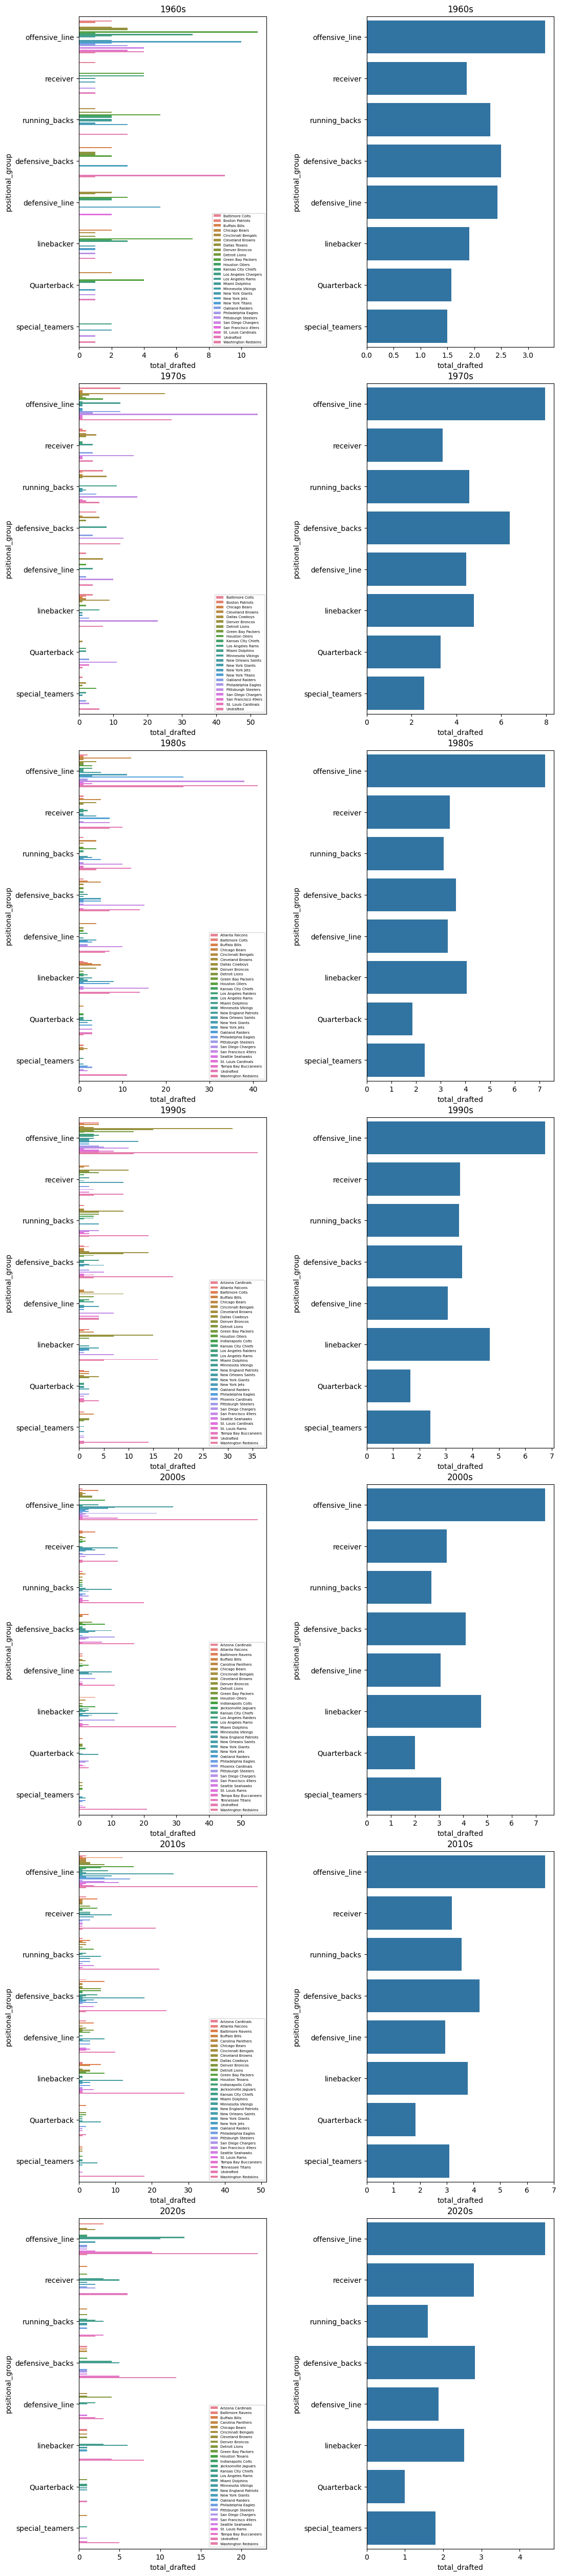

In [63]:
# Plot to show which positions were drafted/signed the most by decade, and by which teams

# Conclusion: Overall players that were on superbowl winning teams included a lot of offensive linemen throughout the decades
# Defensive back and linebackers tended to be the next sought after group in terms of overall numbers

positions_order = ['offensive_line', 'receiver', 'running_backs', 'defensive_backs', 'defensive_line', 'linebacker', 'Quarterback', 'special_teamers']

fig, ax = plt.subplots(7,2, figsize=(10, 50))
sns.color_palette()
fig.tight_layout(w_pad=11.0, h_pad=3.0)
i = 0
for decade in drafted_sbw_pos_group['decade'].unique():
    data=drafted_sbw_pos_group.loc[drafted_sbw_pos_group['decade'] == decade]
    sns.barplot(data=data, y='positional_group', x='total_drafted', order=positions_order, 
                hue='drafted_team/undrafted', ax=ax[i, 0]).legend(fontsize='5')
    ax[i, 0].set_title(decade)
    sns.barplot(data=data, y='positional_group', x='total_drafted', order=positions_order, errorbar=None, ax=ax[i, 1])#.legend(fontsize='5')
    ax[i, 1].set_title(decade)
    i += 1
plt.show()

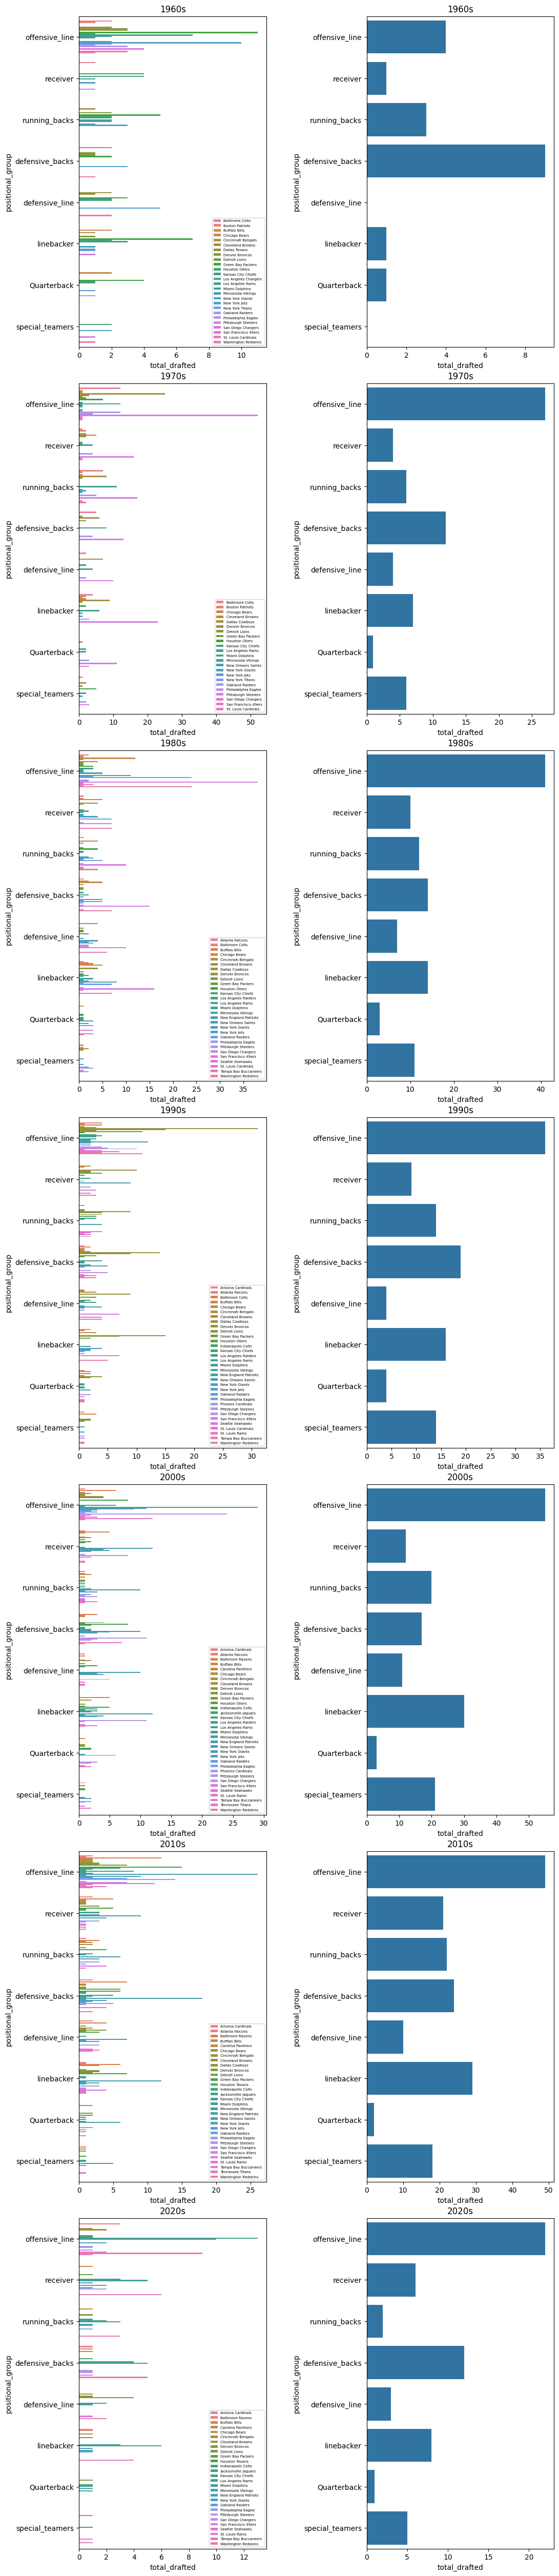

In [64]:
fig, ax = plt.subplots(7,2, figsize=(10, 50))
sns.color_palette()
fig.tight_layout(w_pad=11.0, h_pad=3.0)
i = 0
for decade in drafted_sbw_pos_group['decade'].unique():
    data=drafted_sbw_pos_group.loc[drafted_sbw_pos_group['decade'] == decade]
    sns.barplot(data=data.loc[data['drafted_team/undrafted'] != 'Undrafted'], y='positional_group', x='total_drafted', 
                order=positions_order, hue='drafted_team/undrafted', ax=ax[i, 0]).legend(fontsize='5')
    ax[i, 0].set_title(decade)
    sns.barplot(data=data.loc[data['drafted_team/undrafted'] == 'Undrafted'], y='positional_group', x='total_drafted', order=positions_order, 
                errorbar=None, ax=ax[i, 1])#.legend(fontsize='5')
    ax[i, 1].set_title(decade)
    i += 1
plt.show()

### Player draft analysis conclusions: 

In terms of where players who won super bowls were drafted by or if they were drafted at all, we see that throughout the decades, offensive linemen and defensive backs were the highest volume of players signed to rosters that ended up winning super bowls in their careers. 

The first assumption of why offensive linemen are important: protect the quarterback, and win the game up front for the run game. This assumption was valid for both offensive linemen who were drafted and those who went undrafted. 
The next assumption regarding defensive backs, stop the opposing players ability to pass the ball downfield to limit their overall abilities. 


When looking at the number of teams involved in a superbowl winning team's roster, this showed that typically players were signed from 5-6 different teams (free agency also being a 'team' in this case) per super bowl winning roster, when there are a spread out number of teams winning superbowls in a given decade. 

Finally, for the teams that won multiple super bowls in particular decades, it was clear to see that they drafted a lot of players onto their roster themselves, with the the next typical 'team' being players who went undrafted, which goes to show the importance and significance for an NFL organisation to scout extensively, draft well and never count out undrafted free agents when looking to build a super bowl winning roster.